In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


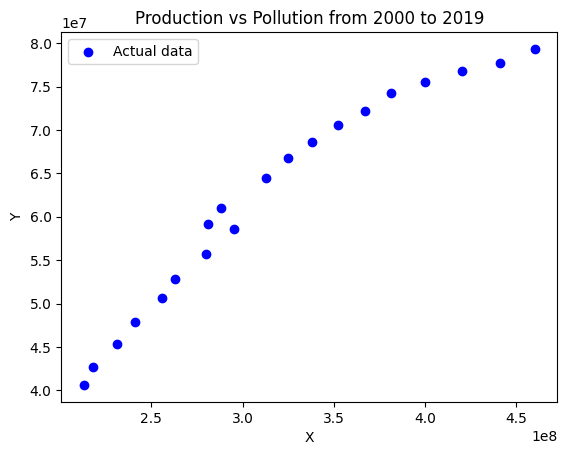

In [35]:
xdata = np.genfromtxt('Preprocessed_Data/global-plastics-production-pollution.csv', delimiter=',', skip_header=1)
pollution_x = xdata[:, 1]

ydata = np.genfromtxt('Preprocessed_Data/plastic-fate.csv', delimiter=',', skip_header=1)
pollution_y = ydata[:, 1]


plt.scatter(pollution_x, pollution_y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Production vs Pollution from 2000 to 2019')
plt.legend()
plt.show()

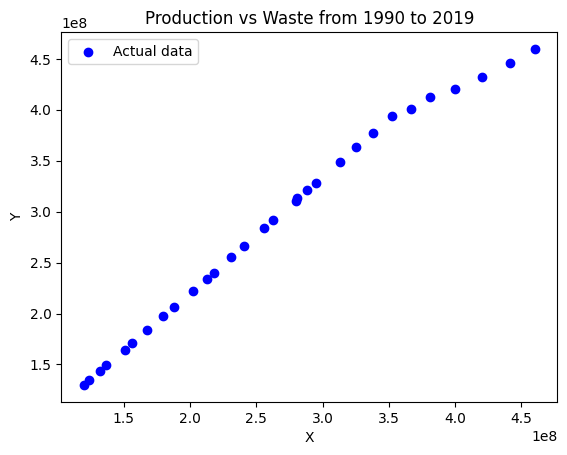

In [36]:
xdata = np.genfromtxt('Preprocessed_Data/global-plastics-production-waste.csv', delimiter=',', skip_header=1)
waste_x = xdata[:, 1]

ydata = np.genfromtxt('Preprocessed_Data/plastic-waste-by-sector.csv', delimiter=',', skip_header=1)
waste_y = ydata[:, 1]


plt.scatter(waste_x, waste_y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Production vs Waste from 1990 to 2019')
plt.legend()
plt.show()

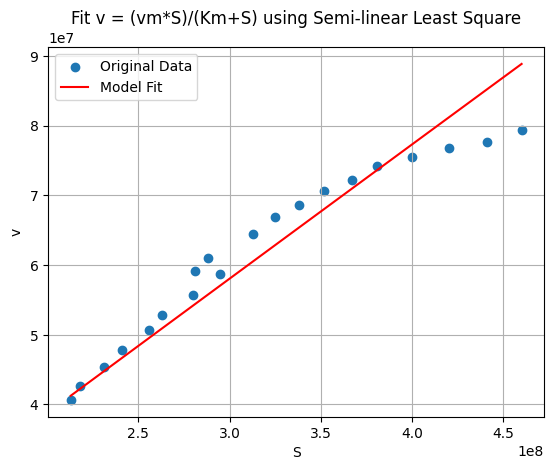

In [ ]:
def linear_fit2(x, y):
    xT = np.transpose(x)
    xTx = np.dot(xT, x)
    xTy = np.dot(xT, y)
    xTx_inv = np.linalg.inv(xTx)
    c = np.dot(xTx_inv, xTy)
    return c

def poly_fit(x, y, num_degrees):
    results = []

    for i in range(1, num_degrees+1):
        xdata = np.linspace(min(x), max(x), 500)
        new_x = np.vander(x, i+1)
        coefficients = linear_fit2(new_x, y)
        final_y = np.polyval(coefficients, xdata)

        #calculate RSS
        sqr_error = np.power((y - np.polyval(coefficients, x)), 2)
        RSS = np.sum(sqr_error)

        #calcualte AIC
        AIC = len(x)*np.log(RSS/len(x))+2*(len(coefficients)+1)

        results.append((i, coefficients, RSS, AIC, xdata, final_y))

    return results
degrees = 5
results, RSSmin, AICmin = poly_fit(pollution_x, pollution_y, degrees) #calculating polynomials starting at 1 degree to 5 degrees
for i in range(0, degrees):
    i, coefficients, RSS, AIC, xdata, final_y = results[i]
    print(f"DEGREE: {i} COEFFICIENTS: {coefficients} \n RSS: {RSS} \n AIC: {AIC}")
    plt.plot(xdata, final_y, label = f"Degree: {i} Fit") 

print("")
plt.title(f"{title1} vs {title2}")
plt.xlabel(title1)
plt.ylabel(title2)
plt.legend() 
plt.show()


Coefficients: [1.02753139]
Intercept: 14801952.148108184
Mean Squared Error: 108373949916375.12
R^2 Score: 0.9841474869418754


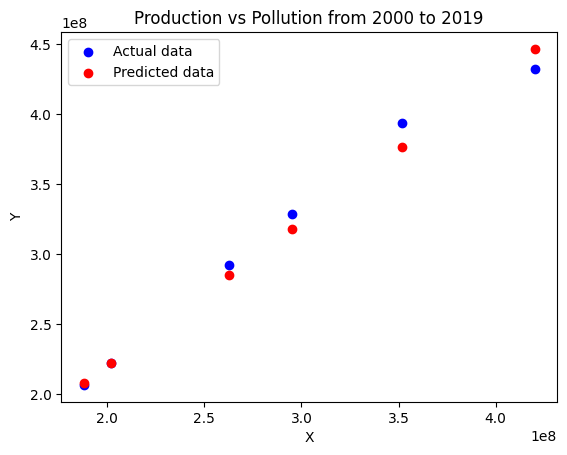

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(waste_x.reshape(-1, 1), waste_y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Production vs Pollution from 2000 to 2019')
plt.legend()
plt.show()